In [2]:
!nvidia-smi 

Tue Aug 23 04:21:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Installing libraries

In [3]:
!pip install transformers -q

     |████████████████████████████████| 4.7 MB 8.0 MB/s 
     |████████████████████████████████| 6.6 MB 51.8 MB/s 
     |████████████████████████████████| 101 kB 13.5 MB/s 


In [4]:
!pip install datasets -q

     |████████████████████████████████| 365 kB 4.9 MB/s 
     |████████████████████████████████| 115 kB 60.6 MB/s 
     |████████████████████████████████| 212 kB 29.7 MB/s 
     |████████████████████████████████| 127 kB 64.9 MB/s 


#Importing datasets

In [5]:
from datasets import load_dataset

In [6]:
raw_datasets = load_dataset("csebuetnlp/squad_bn")
raw_datasets

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset squad_bn downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___squad_bn/squad_bn/0.0.1/17a6d6abc976f299afda17ca9b5ce08a022ecafabe24b3362e16a3093c32df4b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 118117
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 2504
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 2502
    })
})

In [7]:
raw_datasets["train"][0]

{'id': '56ddde6b9a695914005b9628',
 'title': 'Normans',
 'context': 'নর্মানরা (নর্মান: নুরমান্দ; ফরাসি: নরমান্ড; লাতিন: নরমান্নি) ছিল সেই জাতি যারা দশম এবং একাদশ শতাব্দীতে ফ্রান্সের একটি অঞ্চল নরমান্ডিতে তাদের নাম দিয়েছিল। তারা নর্স ("নরম্যান" এসেছে ডেনমার্ক, আইসল্যান্ড এবং নরওয়ে থেকে আগত "নর্সম্যান") হানাদার এবং জলদস্যুদের থেকে, যারা তাদের নেতা রোলোর অধীনে পশ্চিম ফ্রান্সিয়ার রাজা তৃতীয় চার্লসের কাছে আনুগত্যের শপথ নিতে সম্মত হয়েছিল। প্রজন্মের পর প্রজন্ম ধরে স্থানীয় ফ্রাঙ্কিশ এবং রোমান-গৌলিশ জনগোষ্ঠীর সাথে মিশে যাওয়ার মাধ্যমে, তাদের বংশধররা ধীরে ধীরে পশ্চিম ফ্রান্সিয়ার ক্যারোলিনজিয়ান-ভিত্তিক সংস্কৃতির সাথে মিশে যাবে। নর্মানদের স্বতন্ত্র সাংস্কৃতিক ও জাতিগত পরিচয় প্রথম দিকে দশম শতাব্দীর প্রথমার্ধে উদ্ভূত হয়েছিল এবং পরবর্তী শতাব্দীগুলিতে এটি বিবর্তিত হতে থাকে।',
 'question': 'কোন দেশে নরম্যান্ডি অবস্থিত?',
 'answers': {'text': ['ফ্রান্স', 'ফ্রান্স', 'ফ্রান্স', 'ফ্রান্স'],
  'answer_start': [103, 103, 103, 103]}}

In [8]:
raw_datasets["train"][15]

{'id': '5ad3a266604f3c001a3fea2b',
 'title': 'Normans',
 'context': 'মধ্যযুগীয় ইউরোপ এবং এমনকি নিকট প্রাচ্যের উপর নর্মান রাজবংশের একটি প্রধান রাজনৈতিক, সাংস্কৃতিক এবং সামরিক প্রভাব ছিল। নরমানরা তাদের সামরিক মনোভাবের জন্য এবং অবশেষে তাদের খ্রিস্টীয় ভক্তির জন্য খ্যাতি লাভ করেছিল, ক্যাথলিক অর্থোডক্সির প্রবক্তা হয়ে উঠেছিল, যেখানে তারা অন্তর্ভুক্ত হয়েছিল। তারা বসতি স্থাপনকারী ফ্রাঙ্কিশ ভূমির গালো-রোমান্স ভাষা গ্রহণ করে, তাদের উপভাষাটি নরম্যান, নরমান বা নরম্যান ফ্রেঞ্চ নামে পরিচিত হয়ে ওঠে, একটি গুরুত্বপূর্ণ সাহিত্য ভাষা। নরমান্ডির ডাচি, যা তারা ফরাসি মুকুটের সাথে চুক্তির মাধ্যমে গঠিত হয়েছিল, মধ্যযুগীয় ফ্রান্সের একটি বড় ফিফ ছিল, এবং নরমান্ডির রিচার্ড ১ এর অধীনে সামন্ত শাসনামলে একটি সহ-শাসক এবং দুর্দান্ত রাজ্যে পরিণত হয়। নরমানরা তাদের সংস্কৃতি, যেমন তাদের অনন্য রোমানেস্ক স্থাপত্য এবং বাদ্যযন্ত্র ঐতিহ্য, এবং তাদের উল্লেখযোগ্য সামরিক সাফল্য এবং উদ্ভাবনের জন্য উল্লেখযোগ্য। নরম্যান অভিযাত্রীরা বেদুইন ও বাইজেন্টাইনদের উপর দক্ষিণ ইতালি জয়ের পর দ্বিতীয় রজারের অধীনে সিসিলি রাজ্য প্রতিষ্ঠা ক

#Data Viewing and Pre-processing

In [9]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(
        dataset
    ), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
        elif isinstance(typ, Sequence) and isinstance(typ.feature, ClassLabel):
            df[column] = df[column].transform(
                lambda x: [typ.feature.names[i] for i in x]
            )
    display(HTML(df.to_html()))

In [10]:
show_random_elements(raw_datasets["train"])

,id,title,context,question,answers
0,5a1107e006e79900185c34f4,Digimon,"তিন বছর বিরতির পর, ২০০৬ সালের ২রা এপ্রিল পঞ্চম ডিজিমন সিরিজ সম্প্রচার শুরু হয়। ফ্রন্টিয়ারের মতো, সেভার্সের পূর্ববর্তী কিস্তিগুলির সাথে কোন সংযোগ নেই, এবং ডিজিমন ফ্র্যাঞ্চাইজির জন্য একটি নতুন সূচনা চিহ্নিত করে, অক্ষর ডিজাইন এবং গল্প-লাইনে একটি দুর্দান্ত পরিবর্তন সঙ্গে, একটি বৃহত্তর শ্রোতা পৌঁছানোর জন্য। গল্পটি ডি.এ.টি.এস (""ডিজিটাল দুর্ঘটনা কৌশল স্কোয়াড"") এর সদস্যদের চ্যালেঞ্জগুলির উপর দৃষ্টি নিবদ্ধ করে, একটি সংস্থা ডিজিটাল বিশ্ব এবং ডিজিমনের বাকি মানবজাতির অস্তিত্ব গোপন করার জন্য তৈরি করা হয়েছিল এবং গোপনভাবে পৃথিবীতে ঘটে যাওয়া ডিজিমন সম্পর্কিত যে কোন ঘটনার সমাধান করে। পরবর্তীতে ডি.এ.টি.এস.কে পৃথিবী এবং ডিজিটাল জগতের মধ্যে একটি বিশাল সংঘাতে টেনে আনা হয়, যা আকিহিরো কুরাতা নামে একজন উচ্চাভিলাষী মানব বিজ্ঞানী দ্বারা পরিচালিত হয়, তার ব্যক্তিগত লাভের জন্য ডিজিমন ব্যবহার করার জন্য দৃঢ়সংকল্পবদ্ধ। ইংরেজি সংস্করণটি স্টুডিওপোলিস দ্বারা ডাব করা হয়েছিল এবং এটি ১ অক্টোবর, ২০০৭ এ টুন ডিজনির জেটিক্স ব্লকে প্রিমিয়ার হয়েছিল। ডাটা স্কোয়াডে বিভাজনের জন্য ইংরেজি সংস্করণে মানব অংশীদারের ডিএনএ (""ডিজিটাল প্রাকৃতিক ক্ষমতা"" এবং জাপানি সংস্করণে ডিজিসোল) সক্রিয় করা, তাদের ডিজিমনের সাথে একটি শক্তিশালী সহমর্মিতা এবং সফল হওয়ার ইচ্ছা প্রয়োজন। 'ডিজিমন সেভার্স' বাস্ট মোড নামে একটি নতুন ধরনের ডিজিভলভিংয়ের সূচনা করে যা মূলত মেগা-এর উপরে স্তর (পূর্বে সবচেয়ে শক্তিশালী একটি ডিজিমন গ্রহণ করতে পারে)। যেমনটা পূর্বে তামেরসে ছিল, এই কাহিনী পুরো কাহিনী জুড়ে এক অন্ধকার স্বর ধারণ করেছে এবং এই অ্যানিমের মূল লক্ষ্য ছিল জাপানে এক বয়স্ক শ্রোতা, যাদের বয়স ১৬ থেকে ২১ বছর। এই কারণে, নকশাগুলির সাথে, এনাইমটি অতীতের সিরিজের মতো পশ্চিমা মার্কিন দর্শকদের জন্য ব্যাপকভাবে সম্পাদনা এবং স্থানীয় করা হচ্ছে, এবং ইংরেজি ডাবটি বেশিরভাগ ৬ থেকে ১০ বছর বয়সী শিশুদের দিকে লক্ষ্য করা হচ্ছে এবং অতীতের ডাবগুলির মতো টিভি-ওয়াই৭-এফভি রেটিং কম রয়েছে, স্টুডিওপোলিস জেটিক্সকে আরও সম্পাদনা, পরিবর্তন, সেন্সরশিপ এবং কাট ফুটেজের সাথে অ্যানিমেটিকে ডাব করে। এর মধ্যে অন্তর্ভুক্ত ছিল জাপানি অক্ষরগুলিকে সম্পূর্ণ আমেরিকান নাম এবং আমেরিকান পদবিগুলি প্রদান করা পাশাপাশি আরও অনেক বেশি আমেরিকানাইজেশন (জাপানি ডাইমন মাসারুর বিপরীতে মার্কুস দামন) প্রয়োগ করা, সাংস্কৃতিক স্ট্রিমলাইনিং এবং তাদের সংস্করণ ৪ কিডস প্রায়শই করা পরিবর্তনগুলির অনুরূপ আরও সম্পাদনা (যেমন সাংস্কৃতিক স্ট্রিমলাইন করার উদ্দেশ্যে জাপানি পাঠ্য অপসারণ)। এতকিছু সত্ত্বেও দেশটির পটভূমি তখনও জাপানে ছিল এবং চরিত্রগুলি ডাবের মধ্যে জাপানি ছিল। এই ধারাবাহিকটি প্রথম কোন জাপানি সাংস্কৃতিক ধারণা প্রদর্শন করে যা আমেরিকান দর্শকদের সাথে অপরিচিত (যেমন মঞ্জু), যা সম্পাদনা করা হয়নি এবং ইংরেজি ডাবে ব্যবহৃত হয়েছিল। এছাড়াও ভারী সেন্সরশিপ এবং ছোট শিশুদের লক্ষ্য করে ইংরেজি ডাব থাকা সত্ত্বেও, ডিজিমনের কিছু আক্রমণের প্রকৃত অস্ত্র যেমন রিজগ্রেমনের ত্রিশূল রিভলভারের নামে নামকরণ করা হয়েছে, যা ইংরেজি ডাবে সম্পাদিত এবং ব্যবহৃত হয় না। ভালো, মার্কিন যুক্তরাষ্ট্র ডিজনির পরিবর্তে ডিভিডিতে এটি প্রকাশ করেছে। উত্তর আমেরিকার ইংরেজি ডাবটি মার্কিন যুক্তরাষ্ট্রে জেটিক্সে এবং কানাডায় ফ্যামিলি চ্যানেলে প্রচারিত হয়েছিল।",কীভাবে তারা তার পুরোনো শ্রোতাদের সঙ্গে পুনরায় সংযোগ স্থাপন করার চেষ্টা করেছিল?,"{'text': [], 'answer_start': []}"
1,57300664947a6a140053cf75,Muslim_world,"মুসলিম বিশ্বে সাক্ষরতার হার ভিন্ন। কুয়েত, কাজাখস্তান, তাজিকিস্তান এবং তুর্কমেনিস্তানের মতো কিছু সদস্যের সাক্ষরতার হার ৯৭% এরও বেশি, যেখানে মালি, আফগানিস্তান, চাদ এবং আফ্রিকার কিছু অংশে সাক্ষরতার হার সর্বনিম্ন। ২০১৫ সালে ইন্টারন্যাশনাল ইসলামিক নিউজ এজেন্সি রিপোর্ট করে যে মুসলিম বিশ্বের প্রায় ৩৭% মানুষ পড়তে বা লিখতে পারে না, এই সংখ্যাটি অর্গানাইজেশন অফ ইসলামিক কোঅপারেশন এবং ইসলামিক এডুকেশনাল, সায়েন্টিফিক অ্যান্ড কালচারাল অর্গানাইজেশনের রিপোর্টের উপর ভিত্তি করে।",২০১৫ সালে রিপোর্ট করা হয়েছিল যে মুসলিম বিশ্বের কোন শতাংশ সাক্ষর ছিল না?,"{'text': ['৩৭%'], 'answer_start': [294]}"
2,5ace620d32bba1001ae4a4e1,Appalachian_Mountains,"১৭৫৫ সালের মধ্যে, পশ্চিম দিকে সম্প্রসারণের বাধা এইভাবে অর্ধেক হ্রাস পেয়েছিল; ইংরেজ ঔপনিবেশিকদের ঘাঁটিগুলি অ্যালেঘেনি এবং কাম্বারল্যান্ড মালভূমিগুলিতে প্রবেশ করেছিল, ট্রান্সমোন্টেন অঞ্চলে ফরাসি একচেটিয়া অধিকারকে হুমকি দিয়েছিল এবং একটি দ্বন্দ্ব অবশ্যম্ভাবী হয়ে উঠেছিল। ওহাইও উপত্যকার নিয়ন্ত্রণ নির্ধারণের 

##Preprocessing  training data

In [11]:
model_checkpoint = "csebuetnlp/banglabert"
batch_size = 16

In [12]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [13]:
# check if the tokenizer is fast tokenizer

import transformers

assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

In [14]:
tokenizer("আপনার নাম কি?", "আমার নাম ফয়সাল")

{'input_ids': [2, 1338, 993, 817, 35, 3, 878, 993, 16310, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [15]:
max_length = 384  # The maximum length of a feature (question and context)
doc_stride = 128  # The allowed overlap between two part of the context 

In [16]:
for i, example in enumerate(raw_datasets["train"]):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 384:
        break
example = raw_datasets["train"][i]

In [17]:
example

{'id': '57265e455951b619008f70bb',
 'title': 'European_Union_law',
 'context': 'প্রতিষ্ঠার পর থেকে, ইইউ জাতীয় ও বৈশ্বিক আইনি ব্যবস্থার ক্রমবর্ধমান বহুত্বের মধ্যে কাজ করেছে। এর অর্থ ইউরোপীয় বিচার আদালত এবং সর্বোচ্চ জাতীয় আদালত উভয়কেই বিভিন্ন ব্যবস্থার মধ্যে আইনের দ্বন্দ্ব নিরসনের জন্য নীতিমালা প্রণয়ন করতে হয়েছে। ইইউ নিজেই বিচার আদালতের দৃষ্টিভঙ্গি হচ্ছে, ইইউ আইন যদি জাতীয় আইনের কোনো বিধানের সঙ্গে সংঘাত সৃষ্টি করে, তবে ইইউ আইনের প্রাধান্য রয়েছে। ১৯৬৪ সালে প্রথম বড় মামলায় মি. কোস্টা ভি এনেল নামে মিলানের একজন আইনজীবী এবং একটি এনার্জি কোম্পানির সাবেক শেয়ার হোল্ডার ইনেলকে তার বিদ্যুৎ বিল দিতে অস্বীকার করেন। ইতালীয় জ্বালানি কর্পোরেশন জাতীয়করণের প্রতিবাদে তিনি এই বিল দেন। তিনি দাবি করেন যে ইতালির জাতীয়করণ আইন রোম চুক্তির সাথে সাংঘর্ষিক এবং টিএফইইউ-এর ২৬৭ নং অনুচ্ছেদ অনুসারে ইতালির সাংবিধানিক আদালত এবং বিচার আদালত উভয়কে একটি রেফারেন্স দেওয়ার অনুরোধ জানান। ইতালির সাংবিধানিক আদালত এই অভিমত দেয় যে ১৯৬২ সাল থেকে জাতীয়করণ আইন বলবৎ হওয়ায় এবং ১৯৫৮ সাল থেকে এই চুক্তি বলবৎ থাকায় কোস

In [18]:
len(tokenizer(example["question"], example["context"])["input_ids"])

527

In [19]:
max_length

384

In [20]:
len(
    tokenizer(
        example["question"],
        example["context"],
        max_length=max_length,
        truncation="only_second",
    )["input_ids"]
)

384

In [21]:
tokenized_example = tokenizer(
    example["question"],
    example["context"],
    max_length=max_length,
    truncation="only_second",
    return_overflowing_tokens=True,
    stride=doc_stride,
)

In [22]:
tokenized_example

{'input_ids': [[2, 1124, 18181, 1795, 903, 1753, 4472, 1021, 13270, 1189, 1386, 16, 1079, 886, 23941, 14489, 3352, 35, 3, 8338, 804, 842, 16, 18181, 1753, 219, 12622, 9157, 8827, 20202, 12202, 4281, 1021, 1006, 1333, 205, 919, 1520, 8980, 1902, 3517, 903, 3889, 1753, 3517, 5358, 1882, 1431, 8827, 1021, 4472, 10749, 23735, 411, 900, 11934, 10932, 924, 975, 205, 18181, 3282, 1902, 5367, 15027, 1140, 16, 18181, 1795, 1124, 1753, 4472, 1078, 27222, 1031, 13270, 2498, 792, 16, 1079, 18181, 4472, 10621, 1401, 205, 17111, 1460, 1149, 1109, 4560, 1152, 18, 21118, 415, 1871, 2641, 414, 1886, 25573, 764, 1313, 5679, 903, 990, 21310, 6187, 3109, 3821, 8199, 4655, 1985, 820, 772, 826, 3789, 1983, 1251, 5446, 1050, 205, 27497, 10710, 17370, 1753, 16328, 7666, 954, 830, 1983, 1629, 205, 954, 1885, 1050, 831, 16098, 1753, 7795, 1795, 13154, 9701, 1042, 1745, 4828, 4895, 903, 1594, 3645, 11601, 441, 17, 919, 3815, 490, 5243, 16935, 5933, 16098, 15597, 3517, 903, 1902, 3517, 5358, 772, 990, 18191, 2133

In [23]:
tokenizer.decode(tokenized_example['input_ids'][0])

'[CLS] যদি ইইউ আইন এবং জাতীয় আইনের মধ্যে সংঘাত দেখা দেয়, তবে কোন আইনটি অগ্রাধিকার পাবে? [SEP] প্রতিষ্ঠার পর থেকে, ইইউ জাতীয় ও বৈশ্বিক আইনি ব্যবস্থার ক্রমবর্ধমান বহুত্বের মধ্যে কাজ করেছে । এর অর্থ ইউরোপীয় বিচার আদালত এবং সর্বোচ্চ জাতীয় আদালত উভয়কেই বিভিন্ন ব্যবস্থার মধ্যে আইনের দ্বন্দ্ব নিরসনের জন্য নীতিমালা প্রণয়ন করতে হয়েছে । ইইউ নিজেই বিচার আদালতের দৃষ্টিভঙ্গি হচ্ছে, ইইউ আইন যদি জাতীয় আইনের কোনো বিধানের সঙ্গে সংঘাত সৃষ্টি করে, তবে ইইউ আইনের প্রাধান্য রয়েছে । ১৯৬৪ সালে প্রথম বড় মামলায় মি. কোস্টা ভি এনেল নামে মিলানের একজন আইনজীবী এবং একটি এনার্জি কোম্পানির সাবেক শেয়ার হোল্ডার ইনেলকে তার বিদ্যুৎ বিল দিতে অস্বীকার করেন । ইতালীয় জ্বালানি কর্পোরেশন জাতীয়করণের প্রতিবাদে তিনি এই বিল দেন । তিনি দাবি করেন যে ইতালির জাতীয়করণ আইন রোম চুক্তির সাথে সাংঘর্ষিক এবং টিএফইইউ - এর ২৬৭ নং অনুচ্ছেদ অনুসারে ইতালির সাংবিধানিক আদালত এবং বিচার আদালত উভয়কে একটি রেফারেন্স দেওয়ার অনুরোধ জানান । ইতালির সাংবিধানিক আদালত এই অভিমত দেয় যে ১৯৬২ সাল থেকে জাতীয়করণ আইন বলবৎ হওয়ায় এবং ১৯৫৮ সাল থেকে এ

In [24]:
tokenizer.decode(tokenized_example['input_ids'][1])

'[CLS] যদি ইইউ আইন এবং জাতীয় আইনের মধ্যে সংঘাত দেখা দেয়, তবে কোন আইনটি অগ্রাধিকার পাবে? [SEP]্ষিক বলে দাবি করার অধিকারী ছিলেন এবং আদালতের এই সিদ্ধান্তের বিরুদ্ধে কোন আপীল করা না হলে তার দাবীকে একটি রেফারেন্স হিসেবে বিবেচনা করার দায়িত্ব থাকবে । আদালত ভ্যান গেন্ড এন লুসে তার মতামত পুনরাবৃত্তি করে বলেছে, " সীমিত গোলকের মধ্যে থাকা সত্ত্বেও, তাদের সার্বভৌম অধিকার সীমিত করেছে এবং " পারস্পরিকতার ভিত্তিতে " তাদের জাতীয় ও নিজেদের উভয়ের ক্ষেত্রে প্রযোজ্য একটি আইন সংস্থা তৈরি করেছে । ইইউ আইন " গৃহ আইনি বিধান দ্বারা বাড়াবাড়ি হবে না, তবে কাঠামোবদ্ধ... সমাজের আইনগত ভিত্তিকে প্রশ্নবিদ্ধ করা ছাড়া । " এর অর্থ ছিল সদস্য রাষ্ট্রের প্রযোজ্য নয় এমন কোনো " অনুপযুক্ত একতরফা কাজ । " একইভাবে, সিমমেন্টহল স্পা, সিমমেন্টহাল স্পা, একটি কোম্পানী, সিমমেন্টহল স্পা, সিমমেন্টহল স্পা, ফ্রান্স থেকে ইতালি আমদানি করার জন্য 1970 সালের ইতালীয় আইনের অধীনে জনস্বাস্থ্য পরিদর্শন ফি 1964 এবং 1968 সাল থেকে দুটি প্রবিধানের বিপরীতে ছিল । " সামাজিক আইনের অগ্রাধিকারের নীতির সাথে সঙ্গতি রেখে " বিচার আদালত বলেছে, " প্রতিষ্ঠানগ

**Ovarlapping to maintatin the context**

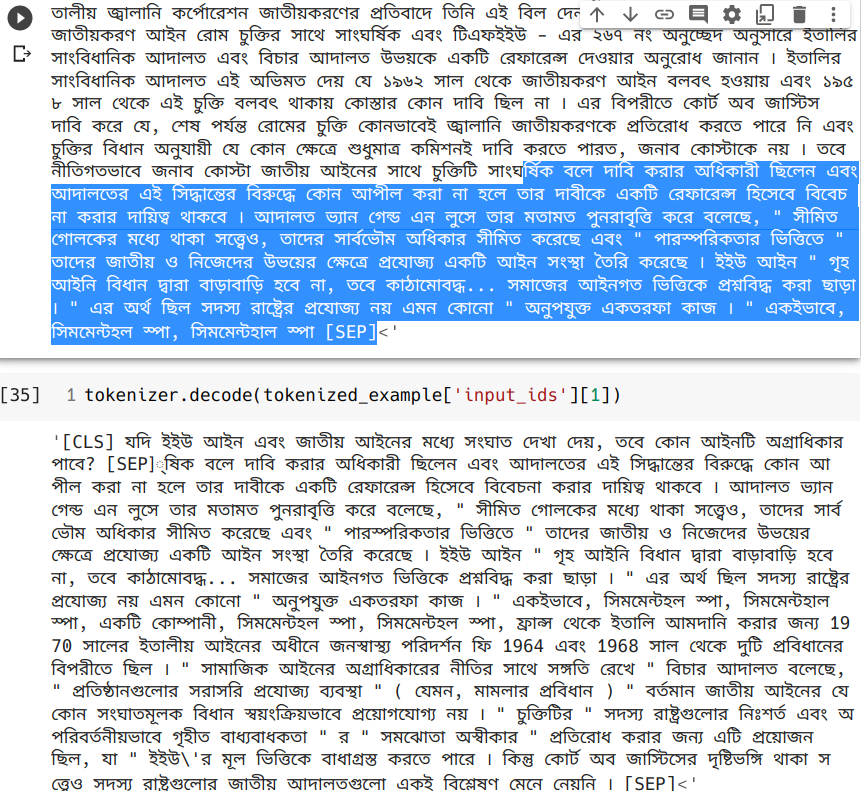

In [25]:
[len(x) for x in tokenized_example["input_ids"]]

[384, 291]

In [26]:

## with offset mapping 

tokenized_example = tokenizer(
    example["question"],
    example["context"],
    max_length=max_length,
    truncation="only_second",
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
    stride=doc_stride,
)

#start and end index of each word 
print(tokenized_example["offset_mapping"][1][:100])

[(0, 0), (0, 3), (4, 7), (8, 11), (12, 15), (16, 22), (23, 28), (29, 34), (35, 40), (41, 45), (46, 50), (50, 51), (52, 55), (56, 59), (60, 65), (66, 76), (77, 81), (81, 82), (0, 0), (1214, 1218), (1219, 1222), (1223, 1227), (1228, 1232), (1233, 1240), (1241, 1246), (1247, 1250), (1251, 1258), (1259, 1261), (1262, 1273), (1274, 1282), (1283, 1286), (1287, 1289), (1289, 1291), (1292, 1295), (1296, 1298), (1299, 1302), (1303, 1306), (1307, 1311), (1311, 1313), (1314, 1318), (1319, 1328), (1329, 1335), (1336, 1343), (1344, 1348), (1349, 1357), (1358, 1363), (1363, 1364), (1365, 1370), (1371, 1376), (1377, 1379), (1379, 1382), (1383, 1385), (1386, 1389), (1389, 1390), (1391, 1394), (1395, 1400), (1401, 1412), (1413, 1416), (1417, 1422), (1422, 1423), (1424, 1425), (1425, 1430), (1431, 1435), (1435, 1437), (1438, 1443), (1444, 1448), (1449, 1457), (1457, 1458), (1459, 1464), (1465, 1473), (1474, 1480), (1481, 1486), (1487, 1492), (1493, 1496), (1497, 1498), (1498, 1507), (1507, 1510), (1511,

In [27]:
len(tokenized_example["offset_mapping"][1]),len(tokenized_example["offset_mapping"][0])

(291, 384)

In [28]:
first_token_id = tokenized_example["input_ids"][0][1]
offsets = tokenized_example["offset_mapping"][0][1]
print(
    tokenizer.convert_ids_to_tokens([first_token_id])[0],
    example["question"][offsets[0] : offsets[1]],
)

যদি যদি


In [29]:
first_token_id = tokenized_example["input_ids"][0][2]
offsets = tokenized_example["offset_mapping"][0][2]
print(
    tokenizer.convert_ids_to_tokens([first_token_id])[0],
    example["question"][offsets[0] : offsets[1]],
)

ইইউ ইইউ


In [30]:
sequence_ids = tokenized_example.sequence_ids()
print(sequence_ids)

[None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [31]:
example

{'id': '57265e455951b619008f70bb',
 'title': 'European_Union_law',
 'context': 'প্রতিষ্ঠার পর থেকে, ইইউ জাতীয় ও বৈশ্বিক আইনি ব্যবস্থার ক্রমবর্ধমান বহুত্বের মধ্যে কাজ করেছে। এর অর্থ ইউরোপীয় বিচার আদালত এবং সর্বোচ্চ জাতীয় আদালত উভয়কেই বিভিন্ন ব্যবস্থার মধ্যে আইনের দ্বন্দ্ব নিরসনের জন্য নীতিমালা প্রণয়ন করতে হয়েছে। ইইউ নিজেই বিচার আদালতের দৃষ্টিভঙ্গি হচ্ছে, ইইউ আইন যদি জাতীয় আইনের কোনো বিধানের সঙ্গে সংঘাত সৃষ্টি করে, তবে ইইউ আইনের প্রাধান্য রয়েছে। ১৯৬৪ সালে প্রথম বড় মামলায় মি. কোস্টা ভি এনেল নামে মিলানের একজন আইনজীবী এবং একটি এনার্জি কোম্পানির সাবেক শেয়ার হোল্ডার ইনেলকে তার বিদ্যুৎ বিল দিতে অস্বীকার করেন। ইতালীয় জ্বালানি কর্পোরেশন জাতীয়করণের প্রতিবাদে তিনি এই বিল দেন। তিনি দাবি করেন যে ইতালির জাতীয়করণ আইন রোম চুক্তির সাথে সাংঘর্ষিক এবং টিএফইইউ-এর ২৬৭ নং অনুচ্ছেদ অনুসারে ইতালির সাংবিধানিক আদালত এবং বিচার আদালত উভয়কে একটি রেফারেন্স দেওয়ার অনুরোধ জানান। ইতালির সাংবিধানিক আদালত এই অভিমত দেয় যে ১৯৬২ সাল থেকে জাতীয়করণ আইন বলবৎ হওয়ায় এবং ১৯৫৮ সাল থেকে এই চুক্তি বলবৎ থাকায় কোস

In [32]:
answers = example["answers"]
start_char = answers["answer_start"][0]
end_char = start_char + len(answers["text"][0])

token_start_index = 0
while sequence_ids[token_start_index] != 1:
    token_start_index += 1

token_end_index = len(tokenized_example["input_ids"][0]) - 1
while sequence_ids[token_end_index] != 1:
    token_end_index -= 1

offsets = tokenized_example["offset_mapping"][0]
if (offsets[token_start_index][0] <= start_char and offsets[token_end_index][1] >= end_char):
    
    while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
        token_start_index += 1
    start_position = token_start_index - 1
    while offsets[token_end_index][1] >= end_char:
        token_end_index -= 1
    end_position = token_end_index + 1
    print(start_position, end_position)
else:
    print("The answer is not in this feature.")

67 68


In [33]:
example['question']

'যদি ইইউ আইন এবং জাতীয় আইনের মধ্যে সংঘাত দেখা দেয়, তবে কোন আইনটি অগ্রাধিকার পাবে?'

In [34]:
print(
    tokenizer.decode(
        tokenized_example["input_ids"][0][start_position : end_position + 1]
    )
)
print(answers["text"][0])

ইইউ আইন
ইইউ আইন


In [35]:
pad_on_right = tokenizer.padding_side == "right"

## Defining Tokenization Function

In [36]:
def prepare_train_features(examples):
    
    #removing left whitespaces
    examples["question"] = [q.lstrip() for q in examples["question"]]


    tokenized_examples = tokenizer(
        examples["question" if pad_on_right else "context"],
        examples["context" if pad_on_right else "question"],
        truncation="only_second" if pad_on_right else "only_first",
        max_length=max_length,
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

   
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
    
    offset_mapping = tokenized_examples.pop("offset_mapping")

    tokenized_examples["start_positions"] = []
    tokenized_examples["end_positions"] = []

    for i, offsets in enumerate(offset_mapping):
        
        input_ids = tokenized_examples["input_ids"][i]
        cls_index = input_ids.index(tokenizer.cls_token_id)

        
        sequence_ids = tokenized_examples.sequence_ids(i)

        
        sample_index = sample_mapping[i]
        answers = examples["answers"][sample_index]
        
        if len(answers["answer_start"]) == 0:
            tokenized_examples["start_positions"].append(cls_index)
            tokenized_examples["end_positions"].append(cls_index)
        else:
            
            start_char = answers["answer_start"][0]
            end_char = start_char + len(answers["text"][0])

           
            token_start_index = 0
            while sequence_ids[token_start_index] != (1 if pad_on_right else 0):
                token_start_index += 1

            
            token_end_index = len(input_ids) - 1
            while sequence_ids[token_end_index] != (1 if pad_on_right else 0):
                token_end_index -= 1

            
            if not (offsets[token_start_index][0] <= start_char and offsets[token_end_index][1] >= end_char):
                tokenized_examples["start_positions"].append(cls_index)
                tokenized_examples["end_positions"].append(cls_index)
            else:
                
                while token_start_index < len(offsets) and offsets[token_start_index][0] <= start_char:
                    token_start_index += 1
                tokenized_examples["start_positions"].append(token_start_index - 1)
                while offsets[token_end_index][1] >= end_char:
                    token_end_index -= 1
                tokenized_examples["end_positions"].append(token_end_index + 1)

    return tokenized_examples

In [37]:
features = prepare_train_features(raw_datasets["train"][:5])

In [38]:
len(features['input_ids'])

5

In [39]:
features

{'input_ids': [[2, 886, 1772, 6032, 1521, 416, 4633, 35, 3, 29367, 767, 825, 12, 29367, 767, 30, 5639, 1005, 1009, 31, 10201, 30, 6032, 2232, 31, 24599, 30, 6032, 12172, 416, 13, 955, 983, 4676, 1848, 9859, 903, 11573, 18358, 11391, 990, 5734, 6032, 2232, 957, 1060, 993, 4022, 205, 1170, 29076, 417, 12, 6, 6032, 1026, 6, 1999, 11843, 16975, 16, 31805, 1521, 903, 27648, 842, 14157, 6, 29076, 5379, 6, 13, 11776, 903, 25710, 5126, 842, 16, 1848, 1060, 2191, 11477, 904, 6090, 2376, 5996, 1531, 3647, 3494, 18980, 764, 1068, 14083, 764, 7368, 1711, 14687, 1605, 205, 8656, 804, 5295, 1228, 2271, 20525, 928, 903, 6759, 17, 3897, 4776, 13836, 1042, 6204, 1941, 1744, 16, 1060, 17949, 825, 2445, 2445, 2376, 5996, 1531, 5214, 17645, 418, 25638, 418, 17, 11104, 9128, 1042, 6204, 1301, 205, 29367, 13658, 8797, 5347, 219, 19255, 2664, 1149, 1097, 9859, 10973, 19676, 16301, 21612, 1605, 903, 3394, 14382, 8101, 1873, 11039, 801, 1200, 1117, 205, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
raw_datasets["train"].column_names

['id', 'title', 'context', 'question', 'answers']

In [41]:

tokenized_datasets = raw_datasets.map(
    prepare_train_features, batched=True, remove_columns=raw_datasets["train"].column_names
)

  0%|          | 0/119 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [42]:
tokenized_datasets["train"].column_names

['input_ids',
 'token_type_ids',
 'attention_mask',
 'start_positions',
 'end_positions']

#Finetuning

In [43]:
model_checkpoint

'csebuetnlp/banglabert'

###enabling logging with ```wandb```



In [44]:
!pip install wandb -q


     |████████████████████████████████| 1.8 MB 8.3 MB/s 
     |████████████████████████████████| 181 kB 20.9 MB/s 
     |████████████████████████████████| 157 kB 47.9 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 157 kB 59.6 MB/s 
     |████████████████████████████████| 157 kB 56.3 MB/s 
     |████████████████████████████████| 157 kB 51.8 MB/s 
     |████████████████████████████████| 157 kB 48.2 MB/s 
     |████████████████████████████████| 156 kB 63.3 MB/s 


In [45]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### initializing wandb and drive for saving checkpoint and visualization

In [46]:
import wandb 
from google.colab import drive

drive.mount('/content/gdrive')
wandb.init(project = "language-model-bn")

Mounted at /content/gdrive


wandb: Currently logged in as: afschowdhury. Use `wandb login --relogin` to force relogin


###Model definition and initialization

In [47]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at csebuetnlp/banglabert were not used when initializing ElectraForQuestionAnswering: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForQuestionAnswering were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probab

In [ ]:
model.config

###Training Arguments derivation(hyperparameters)

In [53]:
# Training Arguments
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    seed = 42,
    output_dir = f"/content/gdrive/MyDrive/DL_models/language_model_bn/{model_name}-finetuned-bn-squad",
    evaluation_strategy = "steps", #default step 500
    learning_rate=2e-5,
    lr_scheduler_type = "linear",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_strategy = "steps",
    save_steps = 1000,
    save_total_limit=3,
    num_train_epochs=10,
    weight_decay=0.01,
    report_to = "wandb",
    run_name ="language-model-bn(qas)"
    
)

using `logging_steps` to initialize `eval_steps` to 500
PyTorch: setting up devices


In [49]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 119469
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 2614
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 2604
    })
})

In [50]:
from transformers import default_data_collator

data_collator = default_data_collator

In [54]:
trainer = Trainer(
    model=model,
    args = args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

###Training

In [ ]:
trainer.train()

***** Running training *****
  Num examples = 119469
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 74670
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Step,Training Loss,Validation Loss
500,1.900900,1.869108
1000,1.766000,1.770317
1500,1.659500,1.751691
2000,1.620900,1.689309
2500,1.540900,1.767362


***** Running Evaluation *****
  Num examples = 2604
  Batch size = 16
***** Running Evaluation *****
  Num examples = 2604
  Batch size = 16
Saving model checkpoint to /content/gdrive/MyDrive/DL_models/language_model_bn/banglabert-finetuned-bn-squad/checkpoint-1000
Configuration saved in /content/gdrive/MyDrive/DL_models/language_model_bn/banglabert-finetuned-bn-squad/checkpoint-1000/config.json
Model weights saved in /content/gdrive/MyDrive/DL_models/language_model_bn/banglabert-finetuned-bn-squad/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in /content/gdrive/MyDrive/DL_models/language_model_bn/banglabert-finetuned-bn-squad/checkpoint-1000/tokenizer_config.json
Special tokens file saved in /content/gdrive/MyDrive/DL_models/language_model_bn/banglabert-finetuned-bn-squad/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 2604
  Batch size = 16
***** Running Evaluation *****
  Num examples = 2604
  Batch size = 16
Saving model chec